In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('data3.csv')
#df = df.loc[df['Report Type Code'] == 'II']
print(df.shape)
df.head()

(482321, 34)


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2021/05/14 01:51:00 AM,2021/05/14,01:51,2021,Friday,2021/05/14 01:57:00 AM,103010326030,1030103,210295348,211340138.0,II,Initial,NaN,26030,Arson,Arson,Arson,Open or Active,03RD ST \ CUSTER AVE,20240000.0,Bayview,Bayview Hunters Point,10.0,37.744259,-122.387373,POINT (-122.38737260846696 37.74425940578451),56.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
1,2021/04/01 12:00:00 PM,2021/04/01,12:00,2021,Thursday,2021/05/04 09:22:00 AM,102792271000,1027922,216049830,NaN,II,Coplogic Initial,True,71000,Lost Property,Lost Property,Lost Property,Open or Active,NaN,NaN,Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021/05/12 02:00:00 PM,2021/05/12,14:00,2021,Wednesday,2021/05/12 03:56:00 PM,103012006244,1030120,216053944,NaN,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,Richmond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/05/09 10:00:00 PM,2021/05/09,22:00,2021,Sunday,2021/05/09 11:44:00 PM,103015506244,1030155,216053762,NaN,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/05/11 03:00:00 PM,2021/05/11,15:00,2021,Tuesday,2021/05/11 05:20:00 PM,103017806244,1030178,216053778,NaN,II,Coplogic Initial,True,6244,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",Open or Active,NaN,NaN,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
# Select Column of Interests

df1 = df[['Incident Date',
          'Incident Time', 
          'Report Type Code', 
          'Incident Day of Week',
          'Police District', 
          'Incident Description', 
          'Incident Category',
          'Resolution']].copy()

# Check Null Value
print(df1.isnull().sum())

# Dtype conversion

df1['Incident Date'] = pd.to_datetime(df1['Incident Date'])
df1['Incident Time'] = pd.to_datetime(df1['Incident Time'], format = "%H:%M").dt.hour
df1.head()

Incident Date             0
Incident Time             0
Report Type Code          0
Incident Day of Week      0
Police District           0
Incident Description      0
Incident Category       406
Resolution                0
dtype: int64


,Incident Date,Incident Time,Report Type Code,Incident Day of Week,Police District,Incident Description,Incident Category,Resolution
0,2021-05-14,1,II,Friday,Bayview,Arson,Arson,Open or Active
1,2021-04-01,12,II,Thursday,Park,Lost Property,Lost Property,Open or Active
2,2021-05-12,14,II,Wednesday,Richmond,"Theft, From Locked Vehicle, >$950",Larceny Theft,Open or Active
3,2021-05-09,22,II,Sunday,Central,"Theft, From Locked Vehicle, >$950",Larceny Theft,Open or Active
4,2021-05-11,15,II,Tuesday,Central,"Theft, From Locked Vehicle, >$950",Larceny Theft,Open or Active


In [214]:
df1 = df1.sort_values(by='Incident Date')
df1.groupby(by='Incident Date').count()

,Incident Time,Report Type Code,Incident Day of Week,Police District,Incident Description,Incident Category,Resolution
Incident Date,,,,,,,
2018-01-01,526,526,526,526,526,526,526
2018-01-02,393,393,393,393,393,393,393
2018-01-03,429,429,429,429,429,429,429
2018-01-04,468,468,468,468,468,468,468
2018-01-05,447,447,447,447,447,447,447
...,...,...,...,...,...,...,...
2021-07-16,283,283,283,283,283,283,283
2021-07-17,245,245,245,245,245,245,245
2021-07-18,218,218,218,218,218,215,218


In [215]:
df2 = df1.groupby(by='Incident Date').count()
df2['Incident Time']

Incident Date
2018-01-01    526
2018-01-02    393
2018-01-03    429
2018-01-04    468
2018-01-05    447
             ... 
2021-07-16    283
2021-07-17    245
2021-07-18    218
2021-07-19    223
2021-07-20    185
Name: Incident Time, Length: 1297, dtype: int64

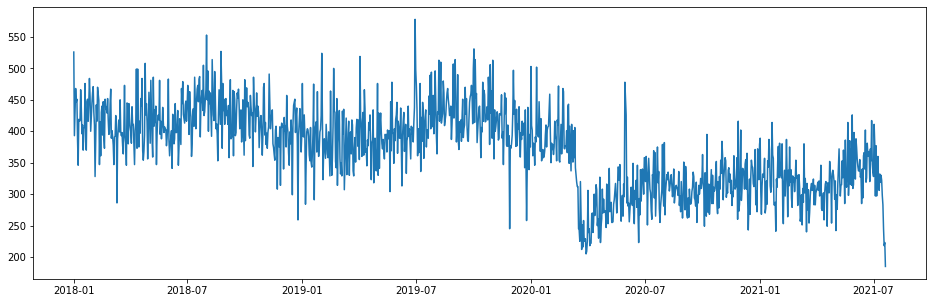

In [202]:
# We use 3/4/2020 as the seperation between pre-pandamic and post pandemic
# Based on first cases diagnosed in the SF area
plt.figure(figsize=(16,5))
plt.plot(df2['Incident Time'])

In [270]:
df1 = df1.sort_values(by='Incident Date')
df_pre = df1[df1['Incident Date'] < '2020-03-04']
df_pan = df1['2020-03-04' < df1['Incident Date']]

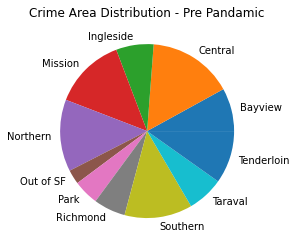

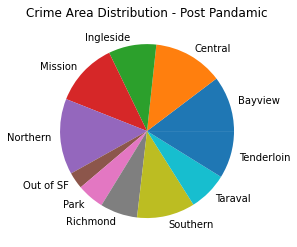

In [253]:
temp1 = df_pre.groupby(by='Police District').count()
plt.figure()
plt.pie(temp1['Incident Date'], labels = temp1.index)
plt.title('Crime Area Distribution - Pre Pandemic')
plt.show()

temp = df_pan.groupby(by='Police District').count()
plt.figure()
plt.pie(temp['Incident Date'], labels=temp.index)
plt.title('Crime Area Distribution - Post Pandemic')
plt.show()

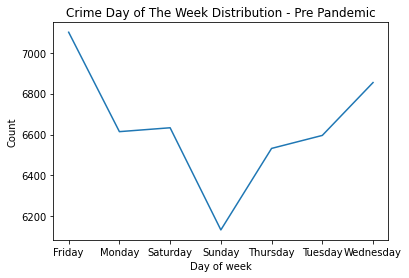

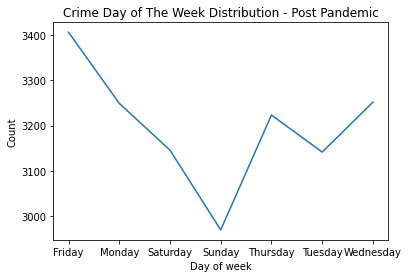

In [278]:
temp1 = df_pre.groupby(by='Incident Day of Week').count()
plt.figure()
plt.plot(temp1['Incident Date']/len(temp1['Incident Date']))
plt.title('Crime Day of The Week Distribution - Pre Pandemic')
plt.ylabel('Count')
plt.xlabel('Day of week')
plt.show()

temp = df_pan.groupby(by='Incident Day of Week').count()
plt.figure()
plt.plot(temp['Incident Date']/len(temp['Incident Date']))
plt.title('Crime Day of The Week Distribution - Post Pandemic')
plt.ylabel('Count')
plt.xlabel('Day of week')
plt.show()

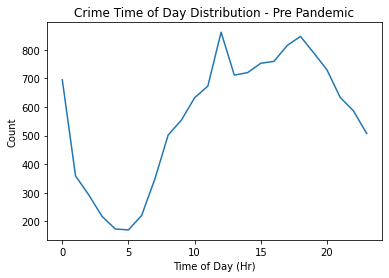

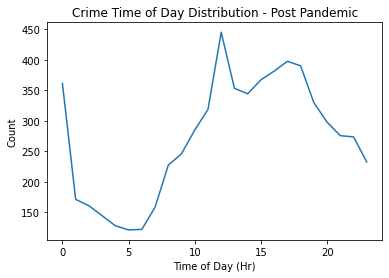

In [275]:
temp1 = df_pre.groupby(by='Incident Time').count()
plt.figure()
plt.plot(temp1['Incident Date']/len(temp1['Incident Date']))
plt.title('Crime Time of Day Distribution - Pre Pandemic')
plt.ylabel('Count')
plt.xlabel('Time of Day (Hr)')
plt.show()

temp = df_pan.groupby(by='Incident Time').count()
plt.figure()
plt.plot(temp['Incident Date']/len(temp['Incident Date']))
plt.title('Crime Time of Day Distribution - Post Pandemic')
plt.ylabel('Count')
plt.xlabel('Time of Day (Hr)')
plt.show()